## Overview of the Project:

##### As a HR analyst working for an MNC. The primary goal here is to work towards the betterment of employees and to make an employee friendly environment. Recently the organisation has started collecting data from employees about their satisfaction towards the company along with internal review of the employee performance. They are interested in the factor/s that affect the satisfaction of employees along with their increased productivity.

### Problem statement:
##### To reiterate, the organisation aims to optimise the environment and productivity of employees. To accomplish this goal, you need to understand extremes, patterns and associations with applications of probability and distributions.

### Let's dive into the analysis:

In [261]:
## importing all the dependencies 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno
from scipy.stats import binom 
from scipy.stats import norm
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

### Overview of the data:

In [262]:
## loading the data and seeing the topview 
df = pd.read_csv(r"C:\Users\TANAY_MAHARANA\Documents\Projects\Statistics Projects\Human Resource Analytics\dataset\HR Data - Capstone Project - Distributions.csv")
df.head()

,EmployeeId,Hrs,Rating,EmployeeSatisfaction
0,E01,12.118051,Excellent,6
1,E02,13.298281,Excellent,8
2,E03,13.276334,Excellent,7
3,E04,10.798173,Excellent,9
4,E05,11.579172,Excellent,8


In [263]:
## checking the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EmployeeId            500 non-null    object 
 1   Hrs                   492 non-null    float64
 2   Rating                500 non-null    object 
 3   EmployeeSatisfaction  500 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [264]:
## seeing the shape of the data
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns")

The data has 500 rows and 4 columns


Missing values in the dataset:
EmployeeId              0
Hrs                     8
Rating                  0
EmployeeSatisfaction    0
dtype: int64
----------------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'Missing values')

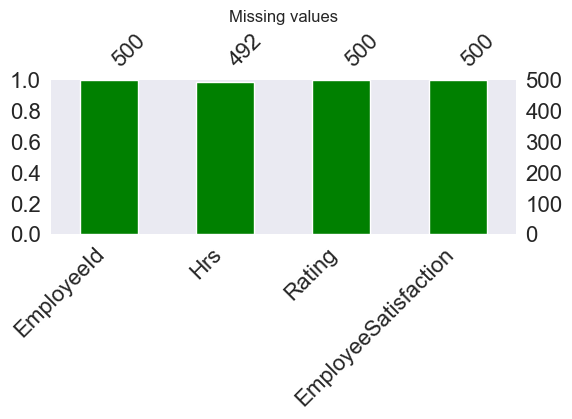

In [265]:
## checking for missing values 
print("Missing values in the dataset:")
print(df.isnull().sum())
print("--"*50)

msno.bar(df, figsize = (6,2), color="green")
plt.tight_layout()
plt.title("Missing values")

In [266]:
## getting the mean of the Hrs column 
print(f"The mean of the Hrs column is {np.mean(df['Hrs']):.2f}")

The mean of the Hrs column is 11.31


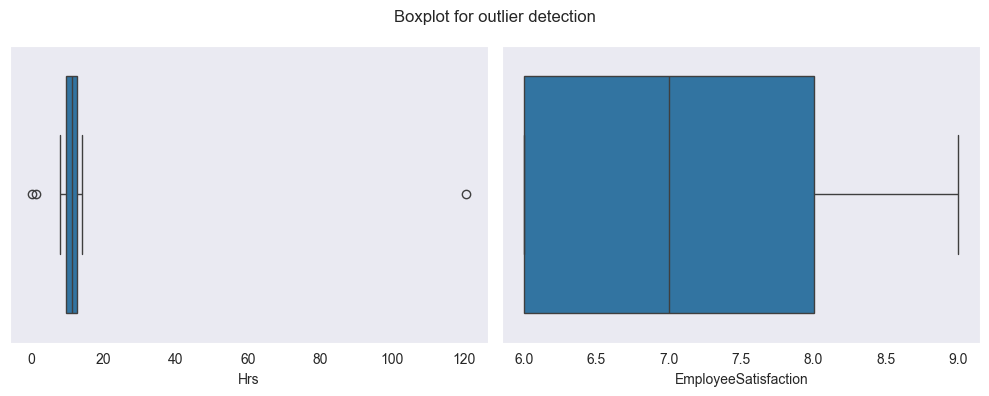

In [267]:
int_columns = df.select_dtypes(["int", "float"]).columns.to_list()
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.set_style("darkgrid")

for i,column in enumerate(df.select_dtypes(["int", "float"])):
    sns.boxplot(x = df[column], ax=axes[i], palette="tab20")
fig.suptitle("Boxplot for outlier detection")
plt.tight_layout()
plt.show()

#### Observation:
- There are few outliers in the Hrs column, to reconfirm if it's an outlier we need to refer to the datasource

In [268]:
## checking the cardinality of the columns
dict = {}
for column in df.columns:
    unique_value = df[column].unique().tolist()
    dict[column] = unique_value

print("Cardinality of the columns are:")
print("--"*20)
for k,v in dict.items():
    print(f"{k} - {len(v)}")

Cardinality of the columns are:
----------------------------------------
EmployeeId - 500
Hrs - 493
Rating - 6
EmployeeSatisfaction - 4


### Data Cleaning:

In [269]:
## checking for misspelled words in ratings column
df["Rating"].value_counts()

Rating
Excellent          371
Outstanding         47
Unsatisfactory      44
Satisfactory        31
satisfactory         4
Un satisfactory      3
Name: count, dtype: int64

In [270]:
## correcting the ratings column 
def correction(val):
    return val.replace(" ", "").capitalize()

df["Rating"] = df["Rating"].apply(correction)

df["Rating"].value_counts()

Rating
Excellent         371
Outstanding        47
Unsatisfactory     47
Satisfactory       35
Name: count, dtype: int64

In [271]:
## imputing the missing values in the Hrs column with the mean 

df["Hrs"].fillna(np.mean(df["Hrs"]), inplace=True)

In [272]:
print("Column with missing values:")
df.isnull().sum()

Column with missing values:


EmployeeId              0
Hrs                     0
Rating                  0
EmployeeSatisfaction    0
dtype: int64

In [273]:
## checking for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


### Understanding the distributions and patterns within the HR data:
- We want to understand why an employee has a satisfactory or unsatisfactory performance as compared to excellent/outstanding performance. This helps in understanding the employee performance within the company and the factors that contribute towards it.

In [274]:
## checking the mode in the rating column 
print("The mode of employee performance in the rating column is:", df["Rating"].mode()[0])

The mode of employee performance in the rating column is: Excellent


In [275]:
## calculating the range of hours the employees work in case of Unsatisfactory Rating

unsatisfactory = df[df["Rating"] == "Unsatisfactory"]
print(f"Max working hours in case of unsatisfactory: {unsatisfactory['Hrs'].max():.2f}")
print(f"Min working hours in case of unsatisfactory: {unsatisfactory['Hrs'].min():.2f}")

Max working hours in case of unsatisfactory: 8.49
Min working hours in case of unsatisfactory: 0.09


#### Observation:
- These stats help us in understanding the different rating factors closely.  We are able to understand that satisfactory and unsatisfactory performances have quite a say in their ratings. Lower ratings are given to employees who are working for lesser hours.

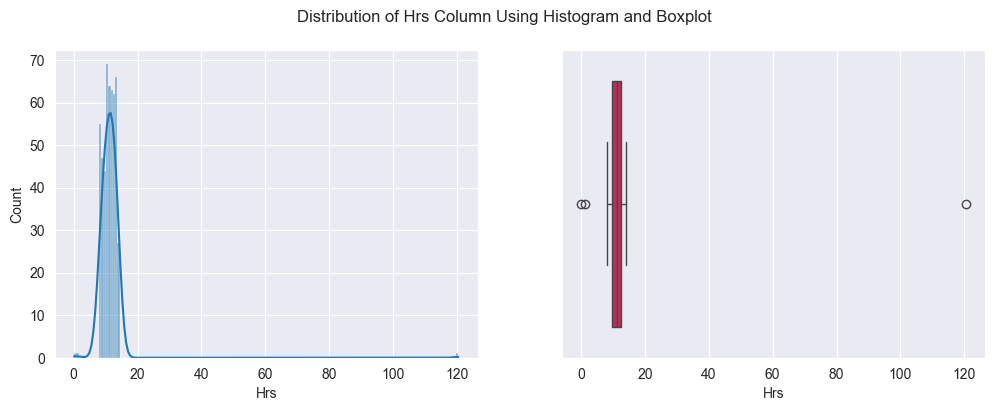

In [276]:
## Checking out the distribution of the Hrs variable using histogram and boxplot.
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.set_style("white")

sns.histplot(x = df["Hrs"], kde=True, palette="viridis", ax=axes[0])
sns.boxplot(x = df["Hrs"], palette="rocket", ax=axes[1])

fig.suptitle("Distribution of Hrs Column Using Histogram and Boxplot")
plt.show()

#### Observation:
- By closely looking into these distribution charts, we can clearly see that the majority of the Hours are centred around 8 to 14 which clearly indicates the outliers towards the higher and lower side.

Text(0.5, 1.0, 'Frequency of different ratings by employees')

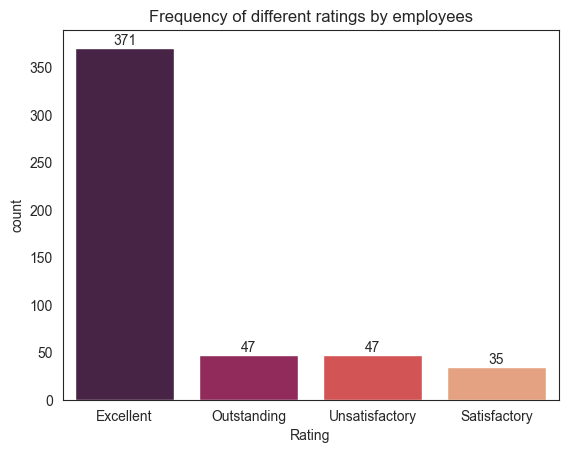

In [277]:
## checking the frequencies of the Rating column 
graph = sns.countplot(x = df["Rating"], palette="rocket")
for bar in graph.containers:
    graph.bar_label(bar)

plt.title("Frequency of different ratings by employees")

In [278]:
## checking the most given satisfaction score
df["EmployeeSatisfaction"].value_counts()

EmployeeSatisfaction
7    161
6    142
8    132
9     65
Name: count, dtype: int64

In [279]:
## checking relation of satisfaction score with working hours
satisfaction_wrt_hrs = df.groupby("EmployeeSatisfaction")["Hrs"].mean().sort_index(ascending=False).to_dict()

print("Satisfaction score - Avg Working Hours:")
for k,v in satisfaction_wrt_hrs.items():
    print(f"Score {k} - {v:.2f} Hours")

Satisfaction score - Avg Working Hours:
Score 9 - 11.02 Hours
Score 8 - 10.97 Hours
Score 7 - 11.11 Hours
Score 6 - 11.99 Hours


#### Observation:
- We can clearly see that the highest frequency is for Excellent rating followed by outstanding and unsatisfactory. Also, we can see that the majority of employees are giving 6 or 7 satisfaction scores which means that the majority of employees aren’t that happy due to lower work life balance. Therefore, our major focus should be towards increasing the work life balance of the employees rather than rewarding the higher number of work hours from the employees.
- It is clear from the above analysis that employees tend to give higher score if they have a lower avg working hours.

In [280]:
## Checking the ralation b/w rating and avg working hours
df.groupby("Rating")["Hrs"].mean()

Rating
Excellent         11.659167
Outstanding       13.739970
Satisfactory       8.930877
Unsatisfactory     7.895444
Name: Hrs, dtype: float64

### Identifying and excluding the outliers!

In [281]:
## identifying outliers in the Hrs column using IQR rule 
Q1 = df["Hrs"].quantile( .25)
Q2 = df["Hrs"].quantile( .50)
Q3 = df["Hrs"].quantile( .75)
Q4 = np.max(df["Hrs"])

IQR = Q3 - Q1                           ## defining the interquartile range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"The lower cutoff of the Hrs column is: {lower_bound:.2f}")
print(f"The upper cutoff of the Hrs column is: {upper_bound:.2f}")

The lower cutoff of the Hrs column is: 5.48
The upper cutoff of the Hrs column is: 16.89


In [282]:
## removing the outliers from the Hrs column 
outliers = df[(df["Hrs"] < lower_bound) | (df["Hrs"] > upper_bound)]
df = df.drop(outliers.index)

print(f"The new mean of the Hrs column after the outlier treatment is: {df['Hrs'].mean():.2f}")

The new mean of the Hrs column after the outlier treatment is: 11.13


### Understanding probability distributions and Confidence interval:

In [283]:
## Identifying the probabilities for each rating within the dataset.
rating_df = df["Rating"].value_counts().to_frame()
rating_df["Probability"] = (rating_df["count"]/rating_df["count"].sum()) *100
rating_df

,count,Probability
Rating,,
Excellent,370,74.446680
Outstanding,47,9.456740
Unsatisfactory,45,9.054326
Satisfactory,35,7.042254


In [284]:
## calculating the probability that 2 out of a sample of 10 employees are rated as outstanding.
## using binomial distribution
p = rating_df.loc["Outstanding", "Probability"]/100        # probability of outstanding
k = 2                                                      # no of employees for probability
n = 10                                                     # total sample size given 

pmf = binom.pmf(k, n, p)
print(f"The probability that 2 out of a sample of 10 employees are rated as outstanding is: {pmf*100:.2f}%")

The probability that 2 out of a sample of 10 employees are rated as outstanding is: 18.18%


In [285]:
## calculating the probability that at least 3 out of a sample of 10 employees are rated as outstanding.
p = rating_df.loc["Outstanding", "Probability"]/100        # probability of outstanding
k = 2                                                      # cumulative probability upto 2 people
n = 10                                                     # total sample size given 

cdf = 1 - binom.cdf(k, n, p)
print(f"The probability that at least 3 out of 10 employees are rated as outstanding is: {cdf*100:.2f}%")

The probability that at least 3 out of 10 employees are rated as outstanding is: 6.11%


In [286]:
## calculating the probability that at least 7 out of a sample of 10 employees are rated as outstanding or Excellent
p = rating_df.loc["Outstanding", "Probability"]/100 + rating_df.loc["Excellent", "Probability"]/100
k = 6                                                      # cumulative probability upto 6 people
n = 10 

cdf = 1 - binom.pmf(k, n, p)
print(f"The probability that at least 7 out of a sample of 10 employees are rated as outstanding or Excellent: {cdf*100:.2f}%")

The probability that at least 7 out of a sample of 10 employees are rated as outstanding or Excellent: 95.08%


In [287]:
## calculating the probability that None out of a sample of 10 employees are rated as Unsatisfactory
p = rating_df.loc["Unsatisfactory", "Probability"]/100       
k = 0                                                    # none of the employees should be unsatisfactory
n = 10                                                   # total sample size

pmf = binom.pmf(k,n,p)
print(f"The probability that None out of a sample of 10 employees are rated as Unsatisfactory: {pmf*100:.2f}%")

The probability that None out of a sample of 10 employees are rated as Unsatisfactory: 38.71%


In [288]:
## Assuming that this variable follows close to normal distribution,
## calculating probability that an employee will provide less than 9 hrs of service
target_hour = 9

z_score = (target_hour - np.mean(df["Hrs"])) / np.std(df["Hrs"])

prob = norm.cdf(z_score)                  # calculate the cumulative probability upto the z-score
print(f"The probability that an employee wil provide less than 9hours of service is: {prob*100:.2f}%")

The probability that an employee wil provide less than 9hours of service is: 10.81%


In [289]:
## calculating the probability that an employee will provide hours of service between 11 to 14

target_hour1 = 11

z_score1 = (target_hour1 - np.mean(df["Hrs"])) / np.std(df["Hrs"])
prob1 = norm.cdf(z_score1)

target_hour2 = 14

z_score2 = (target_hour2 - np.mean(df["Hrs"])) / np.std(df["Hrs"])
prob2 = norm.cdf(z_score2)

prob = prob2 - prob1 
print(f"The probability that an employee will provide hours of service between 11 to 14 is: {prob:.2f}%")

The probability that an employee will provide hours of service between 11 to 14 is: 0.48%


In [300]:
## Calculating the 95% Confidence interval for the average of Hrs variable.
point_estimate = df["Hrs"].mean()
confidence = .95
standard_error = np.std(df["Hrs"]) / np.sqrt(df.shape[0])

margin_of_error = stats.norm.ppf((1+confidence)/2) * standard_error

confidence_interval = (np.mean(df["Hrs"]) - margin_of_error, np.mean(df["Hrs"]) + margin_of_error)
print(f'''The confidence interval for 95% confidence level for Hrs variable is: 
({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})''')

The confidence interval for 95% confidence level for Hrs variable is: 
(10.98, 11.28)


#### Observation:
- The probability that 2 out of a sample of 10 employees are rated as outstanding is: 18.18%
- The probability that at least 3 out of 10 employees are rated as outstanding is: 6.11%
- The probability that at least 7 out of a sample of 10 employees are rated as outstanding or Excellent: 95.08%
- The probability that None out of a sample of 10 employees are rated as Unsatisfactory: 38.71%
- The probability that an employee wil provide less than 9hours of service is: 10.81%
- The probability that an employee will provide hours of service between 11 to 14 is: 0.48%
- The confidence interval for 95% confidence level for Hrs variable is: (10.98, 11.28)

As we can see, higher number of hours have higher chances of occurrence rather than lower ones. The 95% CI of average Hrs also supports this theory. This automatically promotes dissatisfaction among the employees unless we are compensating it by salaries, overtime or excellent perks.

## Insights and Recommendation:
##### 1. High Working Hours: Throughout the analysis, we have witnessed that the organisation somehow rewards the employees working for a high number of hours within the organisation. This could actually be counterproductive as the employees tend to slow and sluggish after a certain point. 

##### Here the recommendation that could be provided is estimating the hours of service that will be needed in a project beforehand for proper allocation of manpower. Higher working hours should be reserved for extreme deadlines or until and unless absolutely necessary.
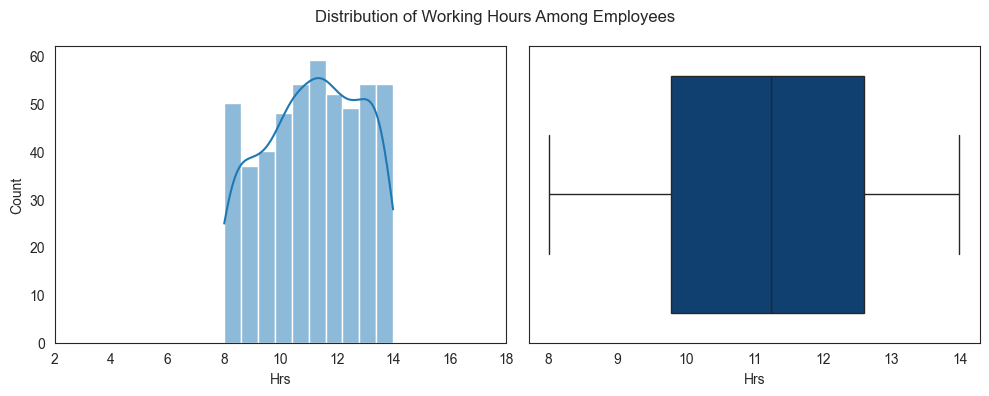

##### 2. Work life balance: In our analysis, we have also witnessed that the highest frequency is for Excellent rating where employees tend to provide a good amount of working hours in general. This management should focus on better work life balance which means these scales should be estimated based on individual performances and their impact on the project rather than on the number of hours of service provided. 
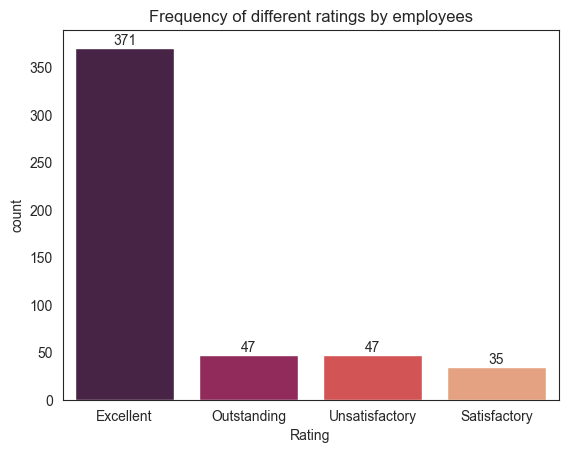 

#### By addressing these challenges and capitalising on the insights drawn from the data, we believe the organisation can significantly enhance the experience of the employees working within the organisation which should be reflected in their satisfaction score down the road.